1. EXPLORATORY DATA ANALYSIS

In [35]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [36]:
# Load the wine dataset
data = pd.read_csv('wine.data')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Basic Information about the dataset
print("\nBasic Information:")
print(data.info())

# Statistical summary of numerical features
print("\nStatistical Summary:")
print(data.describe())

First few rows of the dataset:
   Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
1    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
1    13.16        2.36  2.67               18.6        101           2.80   
1    14.37        1.95  2.50               16.8        113           3.85   
1    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
1        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
1        3.24                  0.30             2.81             5.68  1.03   
1        3.49                  0.24             2.18             7.80  0.86   
1        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wines

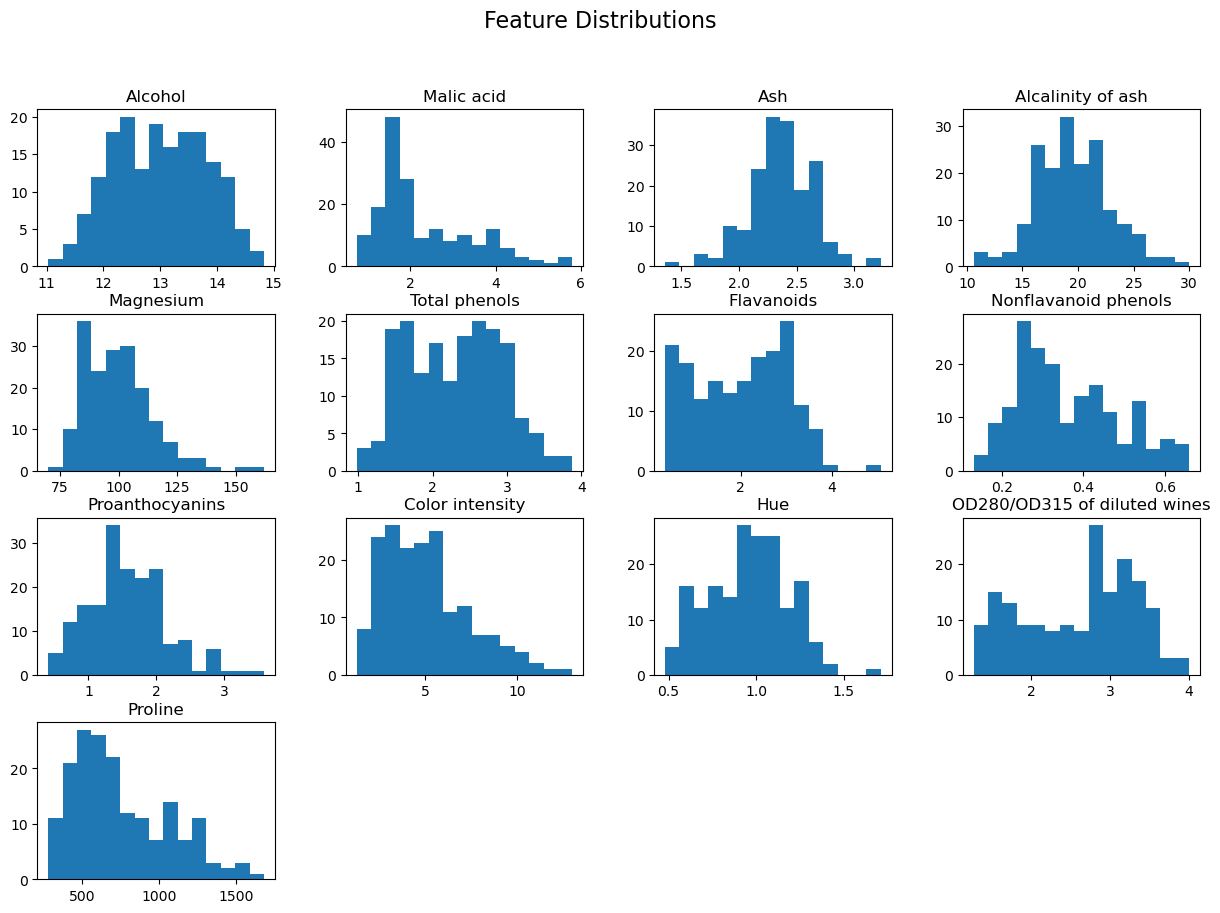

In [37]:
# Visualizing the distribution of each feature using histograms
data.hist(bins=15, figsize=(15, 10), grid=False)
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

In [38]:
# Correlation matrix to understand relationships between variables
corr_matrix = data.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(corr_matrix)


Correlation Matrix:
                               Alcohol  Malic acid       Ash  \
Alcohol                       1.000000    0.094397  0.211545   
Malic acid                    0.094397    1.000000  0.164045   
Ash                           0.211545    0.164045  1.000000   
Alcalinity of ash            -0.310235    0.288500  0.443367   
Magnesium                     0.270798   -0.054575  0.286587   
Total phenols                 0.289101   -0.335167  0.128980   
Flavanoids                    0.236815   -0.411007  0.115077   
Nonflavanoid phenols         -0.155929    0.292977  0.186230   
Proanthocyanins               0.136698   -0.220746  0.009652   
Color intensity               0.546364    0.248985  0.258887   
Hue                          -0.071747   -0.561296 -0.074667   
OD280/OD315 of diluted wines  0.072343   -0.368710  0.003911   
Proline                       0.643720   -0.192011  0.223626   

                              Alcalinity of ash  Magnesium  Total phenols  \
Alcoh

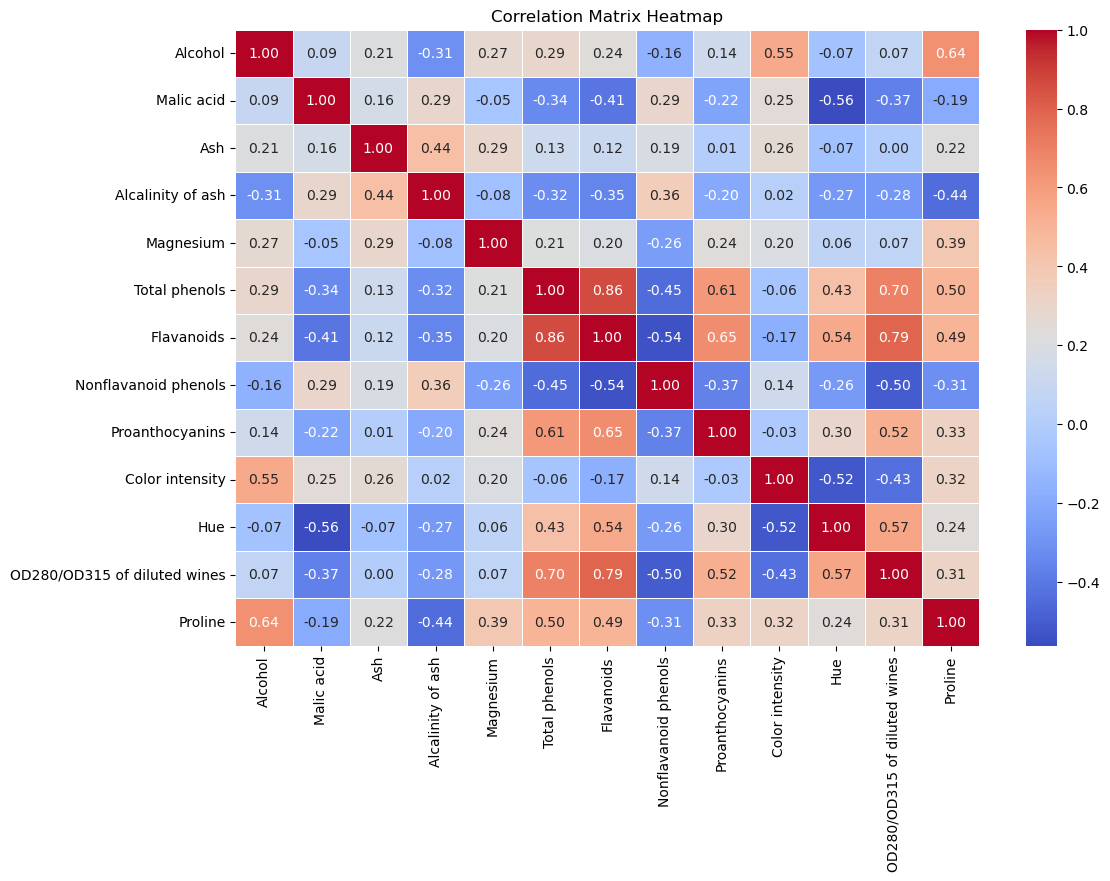

In [39]:
# Plotting a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

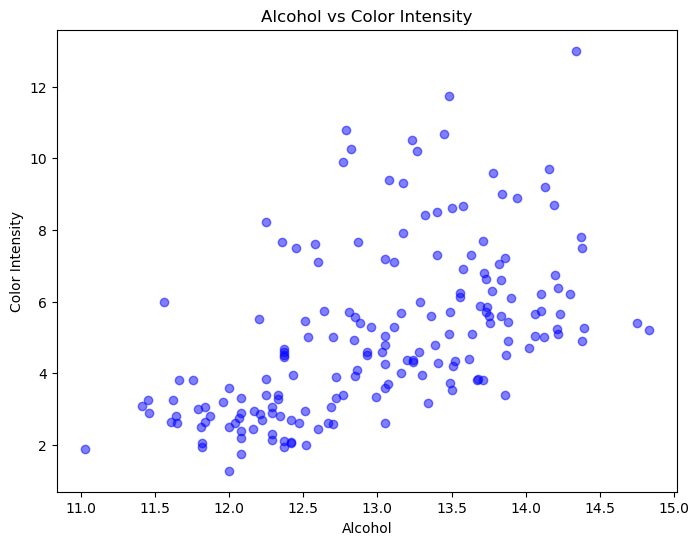

In [40]:
# Visualize the relationship between Alcohol and Color Intensity using scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Alcohol'], data['Color intensity'], c='blue', alpha=0.5)
plt.title("Alcohol vs Color Intensity")
plt.xlabel("Alcohol")
plt.ylabel("Color Intensity")
plt.show()

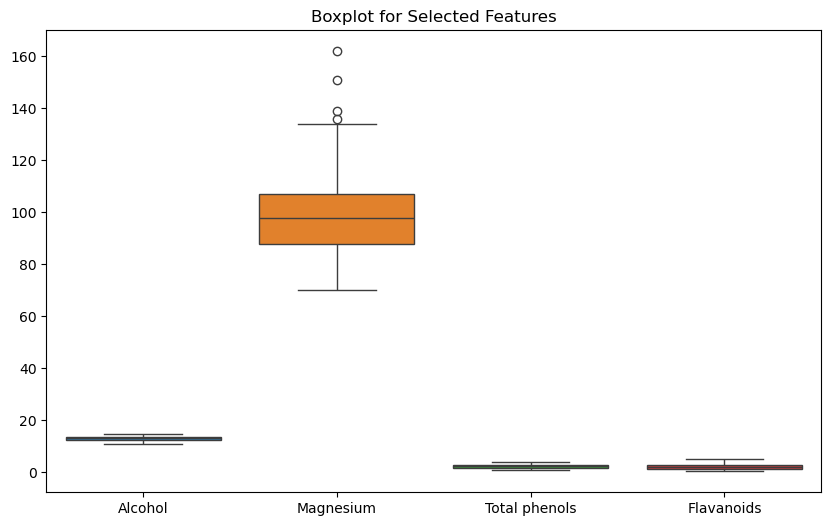

In [41]:
# Boxplot to visualize the spread and outliers in key features
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Alcohol', 'Magnesium', 'Total phenols', 'Flavanoids']])
plt.title('Boxplot for Selected Features')
plt.show()

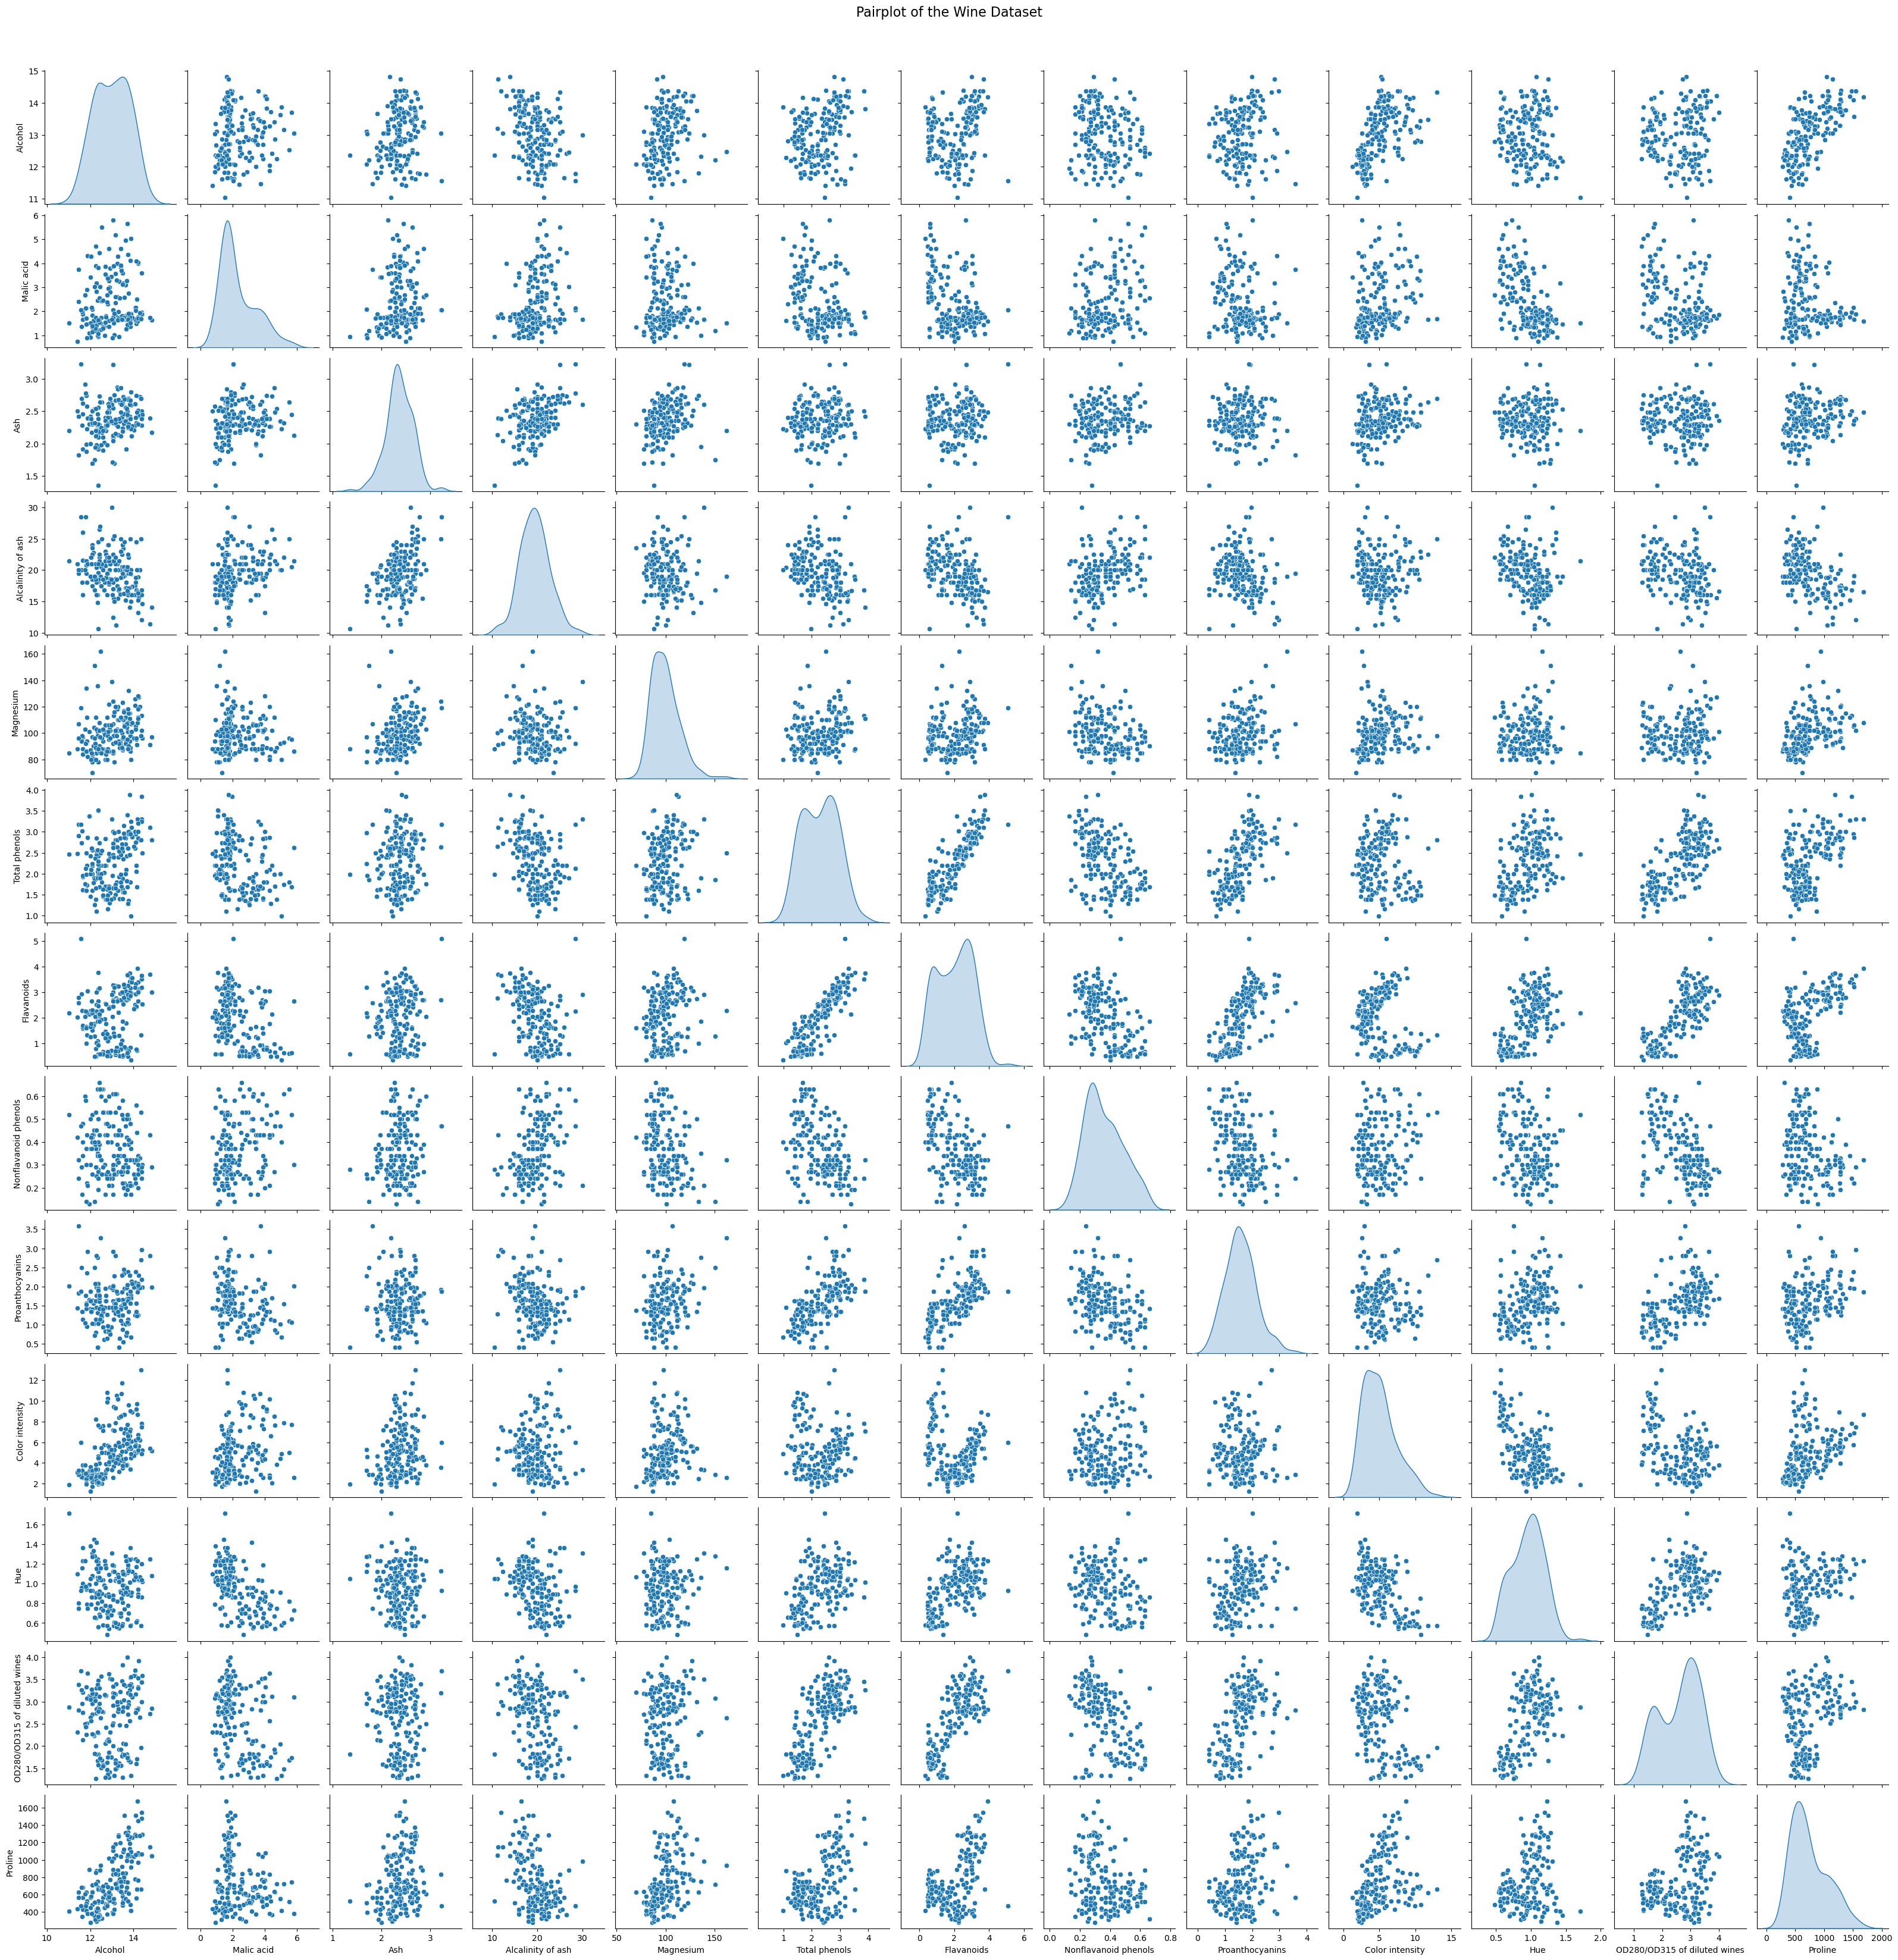

In [42]:
# Pairplot to visualize relationships and distributions between all pairs of features
sns.pairplot(data, diag_kind='kde')
plt.suptitle("Pairplot of the Wine Dataset", y=1.02, fontsize=16)
plt.show()

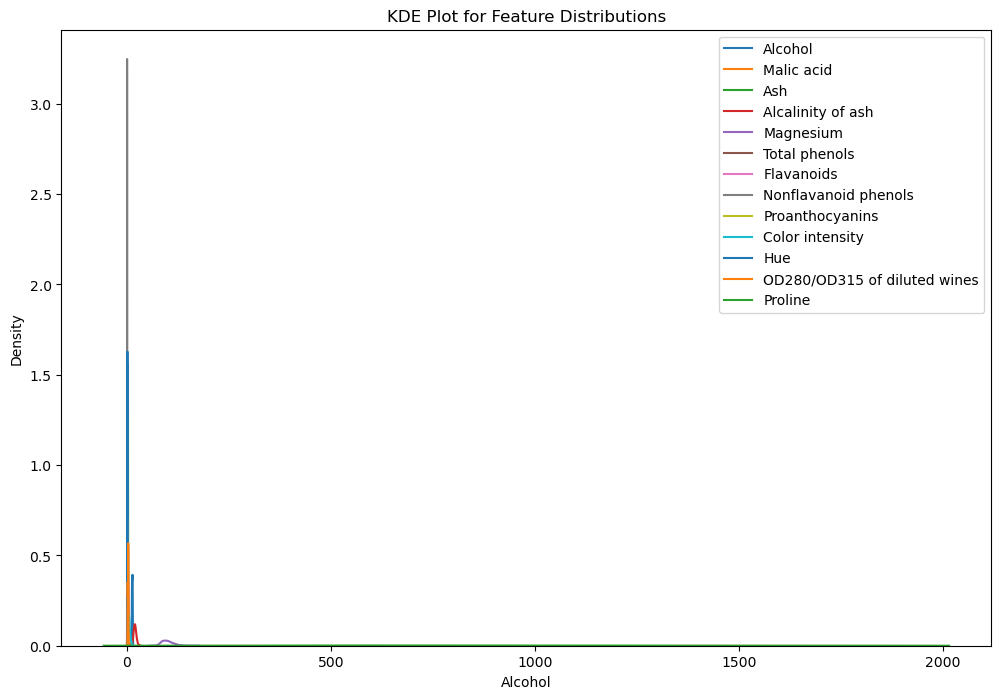

In [43]:
# Distribution of each feature using KDE plots
plt.figure(figsize=(12, 8))
for column in data.columns[0:]:
    sns.kdeplot(data[column], label=column)
plt.title('KDE Plot for Feature Distributions')
plt.legend()
plt.show()

2. PRINCPLE COMPONENT ANALYSIS - 2D

In [44]:
# Check the first few rows of the dataset
print(data.head())

# Step 1: Standardizing the data and Applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
pca = PCA(n_components=2)  # You can increase the components based on explained variance ratio
X_pca = pca.fit_transform(X_scaled)

   Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
1    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
1    13.16        2.36  2.67               18.6        101           2.80   
1    14.37        1.95  2.50               16.8        113           3.85   
1    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
1        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
1        3.24                  0.30             2.81             5.68  1.03   
1        3.49                  0.24             2.18             7.80  0.86   
1        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wines  Proline  
1                  

In [45]:
# Display the principal components (loadings)
# Each row of 'pca.components_' corresponds to a principal component
# Each column corresponds to the original feature
loadings = pca.components_

# Create a DataFrame to show feature loadings
features = data.columns
pca_loadings_df = pd.DataFrame(loadings, columns=features)

# Display the loadings for each principal component
print("PCA Feature Loadings:")
print(pca_loadings_df)

# Optionally, show the explained variance for each component
print("\nExplained Variance Ratio (how much variance each component explains):")
print(pca.explained_variance_ratio_)

# Find the most influential features for each principal component (based on loadings)
def get_influential_features(loadings_df, top_n=5):
    influential_features = {}
    for i, row in loadings_df.iterrows():
        # Sort the features by their absolute loading value
        sorted_features = row.abs().sort_values(ascending=False)
        influential_features[f'PC{i+1}'] = sorted_features.index[:top_n]
    return influential_features

# Get the top 5 most influential features for each component
influential_features = get_influential_features(pca_loadings_df, top_n=5)
print("\nTop 5 most influential features for each principal component:")
print(influential_features)

PCA Feature Loadings:
    Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0  0.144329   -0.245188 -0.002051          -0.239320   0.141992   
1 -0.483652   -0.224931 -0.316069           0.010591  -0.299634   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0       0.394661    0.422934             -0.298533         0.313429   
1      -0.065040    0.003360             -0.028779        -0.039302   

   Color intensity       Hue  OD280/OD315 of diluted wines   Proline  
0        -0.088617  0.296715                      0.376167  0.286752  
1        -0.529996  0.279235                      0.164496 -0.364903  

Explained Variance Ratio (how much variance each component explains):
[0.36198848 0.1920749 ]

Top 5 most influential features for each principal component:
{'PC1': Index(['Flavanoids', 'Total phenols', 'OD280/OD315 of diluted wines',
       'Proanthocyanins', 'Nonflavanoid phenols'],
      dtype='object'), 'PC2': Index(['Color intensity', 'Alcoh

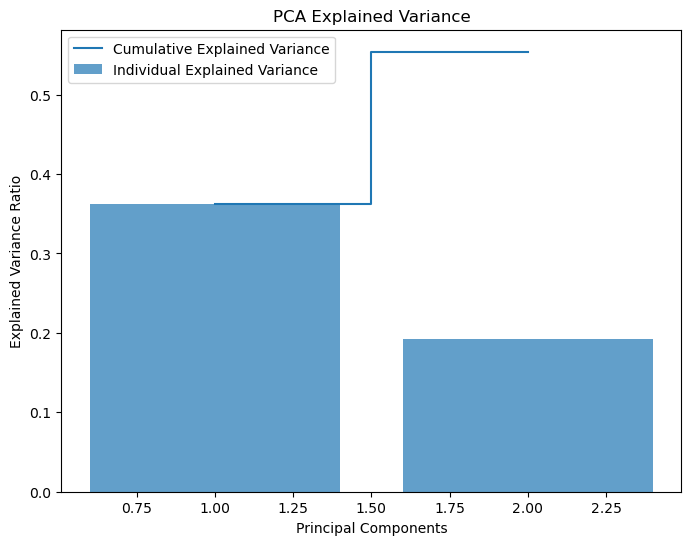

In [46]:
# Plot the explained variance to understand how much variance each component captures
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, align='center', label='Individual Explained Variance')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.legend()
plt.show()

3. KMEANS CLUSTERING - 2D

C:\Users\Ananya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ananya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ananya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ananya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

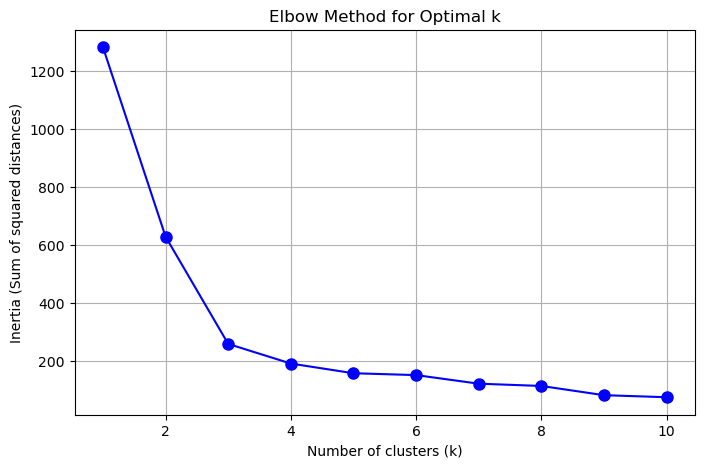

In [47]:
# Step 2: Elbow Method to determine optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [ ]:
# Step 3: KMeans clustering on the PCA-reduced dataset
kmeans = KMeans(n_clusters=3, random_state=42)  # Set number of clusters based on your use case
kmeans.fit(X_pca)
labels = kmeans.labels_

# Step 4: Visualization of clusters in PCA-reduced space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')  # Cluster centers
plt.title('KMeans Clustering on PCA-Reduced Data')
plt.xlabel('PC 1 (Taste Attributes)')
plt.ylabel('PC 2 (Winemaking Process Characteristics)')
plt.grid(True)
plt.show()


In [ ]:
# Calculate clustering metrics
silhouette_avg = silhouette_score(X_pca, labels)
davies_bouldin = davies_bouldin_score(X_pca, labels)
calinski_harabasz = calinski_harabasz_score(X_pca, labels)

# Display the metrics
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")




4. PRINCIPLE COMPONENT ANALYSIS AND KMEANS CLUSTERING - 3D

In [ ]:
# Check the first few rows of the dataset
print(data.head())

# Step 1: Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Step 2: Applying PCA
pca = PCA(n_components=3)  # You can increase the components based on explained variance ratio
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance to understand how much variance each component captures
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, align='center', label='Individual Explained Variance')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.legend()
plt.show()

In [ ]:
# Display the principal components (loadings)
# Each row of 'pca.components_' corresponds to a principal component
# Each column corresponds to the original feature
loadings = pca.components_

# Create a DataFrame to show feature loadings
features = data.columns
pca_loadings_df = pd.DataFrame(loadings, columns=features)

# Display the loadings for each principal component
print("PCA Feature Loadings:")
print(pca_loadings_df)

# Optionally, show the explained variance for each component
print("\nExplained Variance Ratio (how much variance each component explains):")
print(pca.explained_variance_ratio_)

# Find the most influential features for each principal component (based on loadings)
def get_influential_features(loadings_df, top_n=5):
    influential_features = {}
    for i, row in loadings_df.iterrows():
        # Sort the features by their absolute loading value
        sorted_features = row.abs().sort_values(ascending=False)
        influential_features[f'PC{i+1}'] = sorted_features.index[:top_n]
    return influential_features

# Get the top 5 most influential features for each component
influential_features = get_influential_features(pca_loadings_df, top_n=5)
print("\nTop 5 most influential features for each principal component:")
print(influential_features)

In [ ]:
# Step 4: 3D Visualization of clusters in PCA-reduced space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points with cluster labels
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis', marker='o', alpha=0.7)

# Plot the cluster centers
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='x')

# Labeling the axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D KMeans Clustering on PCA-Reduced Data')

# Add legend for clusters
plt.colorbar(scatter, ax=ax)
plt.show()

In [ ]:
# Calculate clustering metrics
silhouette_avg = silhouette_score(X_pca, labels)
davies_bouldin = davies_bouldin_score(X_pca, labels)
calinski_harabasz = calinski_harabasz_score(X_pca, labels)

# Display the metrics
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")